In [232]:
import tensorflow as tf
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time

from IPython import display



In [233]:
# only run to remove images of different sizes.
# just adjust the number equal to b
# from PIL import Image
# import cv2

# files=os.listdir("C:/Users/JoshuaBaus/Untitled Folder/Gan -/Images2/One")
# for file in files:
#     path="C:/Users/JoshuaBaus/Untitled Folder/Gan -/Images2/One/"+file
#     img = cv2.imread(path)
# #     print(img.shape)

# #     im = Image.open(path)
# #     im.close()
# #     height,width = im.size
#     a,b,c=img.shape
#     if b!=3888:
#         os.remove(path)
    
# #     print(file,width,height)

Found 236 files belonging to 1 classes.


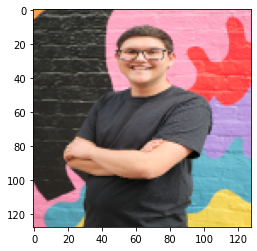

In [234]:
# (train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()
# train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
# train_images = (train_images - 127.5) / 127.5  # Normalize the images to [-1, 1]
path="C:/Users/JoshuaBaus/Untitled Folder/Gan - 2/Images2"
train_images = tf.keras.utils.image_dataset_from_directory(path,batch_size=None, shuffle=False)
# a,b=train_images.take(1)
# print(a)

im_size=128

train_data = [tf.image.rot90(tf.image.resize(((example.numpy()-127.5)/127.5).astype("float32"),size=[im_size,im_size], method='area')) for example, label in train_images]
# train_data = [example for example, label in train_images]

# train_data = [((example.numpy()/255).astype("float32")) for example, label in train_images]


train_images=(train_data)
# train_images = (train_images-127.5)/127.5
# train_images=train_images.map(lambda x,y: (x-127.5)/127.5)

plt.imshow((train_images[2]*127.5+127.5)/255)
# image=train_images.take(1)

# print(train_images.take(1).numpy())

In [235]:
print((train_images[2]*127.5+127.5)/255)


tf.Tensor(
[[[1.         0.6218137  0.27313113]
  [1.         0.63798255 0.29065564]
  [1.         0.63259804 0.2869064 ]
  ...
  [0.9955959  0.68334097 0.7718444 ]
  [0.9677926  0.6090342  0.70638406]
  [0.96819854 0.60858226 0.7170037 ]]

 [[1.         0.6249387  0.26994485]
  [1.         0.61099494 0.24791284]
  [1.         0.63486904 0.28094745]
  ...
  [0.9871438  0.65509725 0.76196   ]
  [0.9774012  0.62084484 0.7231426 ]
  [0.96612287 0.5994562  0.7080959 ]]

 [[1.         0.64326364 0.30409008]
  [1.         0.6602022  0.3248468 ]
  [1.         0.6377183  0.2847771 ]
  ...
  [0.99862134 0.74667966 0.8113856 ]
  [0.99767154 0.72516084 0.7952895 ]
  [0.9840456  0.6878294  0.76850873]]

 ...

 [[0.93216527 0.5576555  0.671381  ]
  [0.92487746 0.5444853  0.66605395]
  [0.92283624 0.5424441  0.66401273]
  ...
  [0.9580193  0.82664675 0.34037223]
  [0.9508464  0.8165326  0.32633656]
  [0.9556181  0.82228476 0.33787912]]

 [[0.91250384 0.53103936 0.6499426 ]
  [0.93562347 0.55523133 0

In [236]:
BUFFER_SIZE = 60000
BATCH_SIZE = 16
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [237]:
num=int(im_size/16)
# num=4
noisen=256
kern=2
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(8*8*256, use_bias=False, input_shape=(noisen,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((8, 8, 256)))
#     assert model.output_shape == (None, 7, 7, 256)  # Note: None is the batch size
    model.add(layers.Conv2DTranspose(128, (kern*2, kern*2), strides=(kern, kern), padding='same', use_bias=False))
#     assert model.output_shape == (None, 7, 7, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (kern*2, kern*2), strides=(kern, kern), padding='same', use_bias=False))
#     assert model.output_shape == (None, 14, 14, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    
    model.add(layers.Conv2DTranspose(32, (kern*2, kern*2), strides=(kern, kern), padding='same', use_bias=False))
#     assert model.output_shape == (None, 14, 14, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(3, (kern*2, kern*2), strides=(kern, kern), padding='same', use_bias=False, activation='tanh'))
#     assert model.output_shape == (None, 28, 28, 3)
    return model

tf.Tensor(
[[[ 5.2924408e-04 -1.7719138e-04  1.9432261e-04]
  [-1.9632280e-06  5.2595197e-04  7.5998041e-04]
  [ 3.3440470e-04  6.0441729e-05 -7.1375299e-04]
  ...
  [-7.7619991e-04  9.0954301e-04  1.0123044e-04]
  [ 1.9831024e-04 -2.6365393e-04 -2.4972024e-04]
  [ 2.0398886e-04  3.5027569e-04  7.1149372e-04]]

 [[ 1.1033794e-03 -1.3357325e-03 -6.8266781e-05]
  [-4.3689543e-03 -3.3726236e-03 -2.5543906e-03]
  [ 2.4116461e-03 -7.3399220e-04  1.1035206e-04]
  ...
  [-7.4728864e-04 -6.1422156e-04 -1.6858033e-03]
  [-1.4163456e-03 -6.2681225e-05  1.4430532e-03]
  [-1.1065622e-03 -4.6307442e-04 -4.4597022e-05]]

 [[ 1.1195390e-03 -2.2315281e-04  7.7520555e-05]
  [ 6.4068922e-04  2.2115258e-03 -1.5193040e-03]
  [ 1.7711350e-03 -1.8525320e-03 -5.9388601e-04]
  ...
  [-4.2751702e-04  2.5023886e-03  5.6298397e-04]
  [-5.9981452e-04 -1.5383000e-03 -3.8383037e-03]
  [ 4.1068942e-04  3.9567036e-04 -5.7263067e-04]]

 ...

 [[-4.5418029e-04 -1.9652303e-04  2.9450253e-05]
  [-1.9502260e-03 -1.0966804

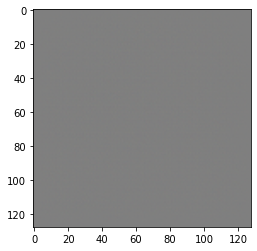

In [238]:
generator = make_generator_model()

noise = tf.random.normal([1, noisen])
generated_image = generator(noise, training=False)
print(generated_image[0,:,:])
plt.imshow((generated_image[0, :, :]*127.5+127.5)/255)

In [239]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[128, 128, 3]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))
    
    model.add(layers.Conv2D(256, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

In [240]:
discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print (decision)

tf.Tensor([[-0.00037663]], shape=(1, 1), dtype=float32)


In [241]:
# This method returns a helper function to compute cross entropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=False)
# cross_entropy = tf.keras.losses.MeanSquaredError()

# def discriminator_loss(real_output, fake_output):
#     real_loss = cross_entropy(tf.ones_like(real_output), real_output)
#     fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
#     total_loss = real_loss + fake_loss
#     return total_loss

# def maxer(real_output,fake_output):
#     tot=0
#     for a,b in zip(real_output,fake_output):
#         gret=real_output <=fake_output
#         tot+=tf.where(gret,-fake_output-real_output,(real_output-fake_output+1)**2)
#     return tot

def maxer(real_output,fake_output):
    tot=0
    gret=real_output <=fake_output
    tot+=tf.where(gret,-fake_output-real_output,(real_output-fake_output))
    return tot
print(maxer(1,1))
print(maxer(1,0))
print(maxer(1,-1))
print(maxer(1,10))
print(maxer(1,-10))


print("")
# def miner(real_output,fake_output):
#     tot=0
#     for a,b in zip(real_output,fake_output):
#         les=real_output >=fake_output
#         tot+= tf.where(les,fake_output-real_output,(real_output-fake_output)**2)
#     return tot

def miner(real_output,fake_output):
    tot=0
    les=real_output-1 >=fake_output
    tot+= tf.where(les,fake_output-real_output-1,(real_output+1+fake_output))
    return tot
print(miner(0,-1))
print(miner(0,0))
print(miner(0,1))
print(miner(0,-10))
print(miner(0,10))




def discriminator_loss(real_output, fake_output):
#     real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    real_loss= maxer(tf.ones_like(real_output),real_output)
#     fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    fake_loss = miner(tf.zeros_like(fake_output),fake_output)
#     print(tf.math.reduce_sum(real_loss))
#     print("")
#     total_loss = tf.add(real_loss, fake_loss)
    return (tf.math.reduce_sum(real_loss) + tf.math.reduce_sum(fake_loss))/fake_output.shape[0]



    

tf.Tensor(-2, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(-11, shape=(), dtype=int32)
tf.Tensor(11, shape=(), dtype=int32)

tf.Tensor(-2, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(-11, shape=(), dtype=int32)
tf.Tensor(11, shape=(), dtype=int32)


In [242]:
# def generator_loss(fake_output):
# #     print(fake_output)
# #     print(tf.ones_like(fake_output))
# #     print((cross_entropy(tf.ones_like(fake_output), fake_output)))
#     return (cross_entropy(tf.ones_like(fake_output), fake_output))

def generator_loss(fake_output):
#     print(fake_output)
#     print(tf.ones_like(fake_output))
#     print((cross_entropy(tf.ones_like(fake_output), fake_output)))
    return tf.math.reduce_sum(maxer(tf.ones_like(fake_output), fake_output))/fake_output.shape[0]

In [243]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [244]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

In [245]:
EPOCHS = 10000
noise_dim = noisen
num_examples_to_generate = 16

gen_los=0
disc_los=0
gen_losses=[]
disc_losses=[]
x_axis=[]

# You will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
seed = tf.random.normal([num_examples_to_generate, noise_dim])

In [246]:

# @tf.function
# def prep_step(images):
    

# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
# @tf.function
def train_step(images):
    global gen_los,disc_los
    noise = tf.random.normal([BATCH_SIZE, noise_dim])
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
    
    gen_los=gen_loss
    disc_los=disc_loss
   

In [247]:
def train(dataset, epochs):
    beg = time.time()
    
    for epoch in range(epochs):
        start = time.time()
        for image_batch in dataset:
            train_step(image_batch)
        

        # Produce images for the GIF as you go
        display.clear_output(wait=True)
        generate_and_save_images(generator,
                                 epoch + 1,
                                 seed)

        # Save the model every 15 epochs
        if (epoch + 1) % 15 == 0:
            checkpoint.save(file_prefix = checkpoint_prefix)

        print ('Time for epoch {} is {} sec, total is {} mins, average is {} sec/epoch'.format(epoch + 1, time.time()-start, round((time.time()-beg)/60, 2), round((time.time()-beg)/(epoch+1), 2)))
#         display.clear_output(wait=True)
        print("Losses:  Gen: {}, Disc: {}".format(gen_los,disc_los))
        gen_losses.append(gen_los)
        disc_losses.append(disc_los)
        x_axis.append(epoch)
        #Generate after the final epoch
    display.clear_output(wait=True)
    generate_and_save_images(generator,
                           epochs,
                           seed)
    print ('Time for epoch {} is {} sec, total is {} mins, average is {} sec/epoch'.format(epoch + 1, time.time()-start, round((time.time()-beg)/60, 2), round((time.time()-beg)/(epoch+1), 2)))


In [248]:
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(4, 4))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow((predictions[i, :, :]*127.5+127.5)/255)
      plt.axis('off')

  plt.savefig('image_at_epoch/image_at_epoch_{:04d}.png'.format(epoch))

  plt.show()

In [249]:
# disc=make_discriminator_model()
# gen=make_generator_model()
# gen_opt = tf.keras.optimizers.Adam(1e-4)
# disc_opt = tf.keras.optimizers.Adam(1e-4)
# # adjust to restart from a checkpoint
# # checkpoint_dir = './training_checkpoints'
# # #     checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt-"+str(i+500))
# # checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt-Five-"+str(int(6000/15)))

# # checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
# #                                  discriminator_optimizer=disc_opt,
# #                                  generator=generator,
# #                                  discriminator=disc)

# # checkpoint.restore(checkpoint_prefix)

# # checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt-Five-"+str(int(1500/15)))

# # checkpoint = tf.train.Checkpoint(generator_optimizer=gen_opt,
# #                                  discriminator_optimizer=discriminator_optimizer,
# #                                  generator=gen,
# #                                  discriminator=discriminator)
# # checkpoint.restore(checkpoint_prefix)
# # noise = tf.random.normal([1, noisen])
# # generated_image = generator(noise, training=False)
# # # print(generated_image[0,:,:])
# # plt.imshow((generated_image[0, :, :]*127.5+127.5)/255)
# # plt.show()
# # # print(i)

# checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt-Six")


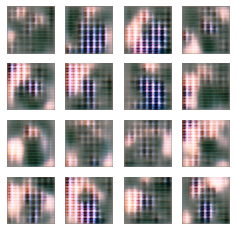

Time for epoch 799 is 2.9595415592193604 sec, total is 38.37 mins, average is 2.88 sec/epoch
Losses:  Gen: 697205.0, Disc: -193955.5625


KeyboardInterrupt: 

In [250]:
gen_losses=[]
disc_losses=[]
x_axis=[]
train(train_dataset, EPOCHS)

Generator


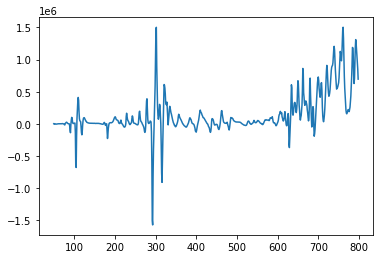

Discriminator


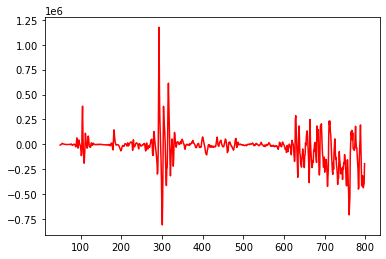

In [251]:
print("Generator")
plt.plot(x_axis[50:],gen_losses[50:])

plt.show()
print("Discriminator")
plt.plot(x_axis[50:],disc_losses[50:],color="red")

plt.show()


In [ ]:
# # checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))
# for i in range(100):
#     display.clear_output(wait=True)    
#     checkpoint_dir = './training_checkpoints'
# #     checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt-"+str(i+500))
#     checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt-"+str(550+i))
#     # checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))
#     checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
#                                      discriminator_optimizer=discriminator_optimizer,
#                                      generator=generator,
#                                      discriminator=discriminator)
#     checkpoint.restore(checkpoint_prefix)
#     noise = tf.random.normal([1, noisen])
#     generated_image = generator(noise, training=False)
#     # print(generated_image[0,:,:])
#     plt.imshow((generated_image[0, :, :]*127.5+127.5)/255)
#     plt.show()
#     print(i)


In [ ]:
def display_image(epoch_no):
  return PIL.Image.open('image_at_epoch/image_at_epoch_{:04d}.png'.format(epoch_no))

In [ ]:
# display_image(EPOCHS)
display_image(9500)

In [ ]:
anim_file = 'dcgan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
  filenames = glob.glob('image_at_epoch/image*.png')
  filenames = sorted(filenames)
  for filename in filenames:
    image = imageio.imread(filename)
    writer.append_data(image)
  image = imageio.imread(filename)
  writer.append_data(image)

In [ ]:
noise = tf.random.normal([1, noisen])
generated_image = generator(noise, training=False)
# print(generated_image[0,:,:])
plt.imshow((generated_image[0, :, :]*127.5+127.5)/255)

In [ ]:
    checkpoint_dir = './training_checkpoints'
#     checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt-"+str(i+500))
    checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt-"+str(550+90))
    # checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))
    checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                     discriminator_optimizer=discriminator_optimizer,
                                     generator=generator,
                                     discriminator=discriminator)
    checkpoint.restore(checkpoint_prefix)
    noise = tf.random.normal([1, noisen])
    generated_image = generator(noise, training=False)
    # print(generated_image[0,:,:])
    plt.imshow((generated_image[0, :, :]*127.5+127.5)/255)
    plt.show()
    print(i)